使用神经网络对服装进行分类，本篇有助于理解整个TF程序的流程, 本篇使用的是tf.keras高阶api

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 加载数据集、数据集探索

In [45]:
class_names = [
    'T-shirt/top', 
    'Trouser', 
    'Pullover', 
    'Dress', 
    'Coat',
    'Sandal', 
    'Shirt', 
    'Sneaker', 
    'Bag', 
    'Ankle boot'
]
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


9


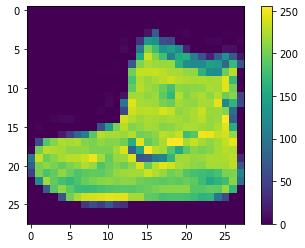

In [46]:
print(y_train[0])
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [47]:
# 数据标准化
X_train, X_test = x_train/255.0, x_test/255.0

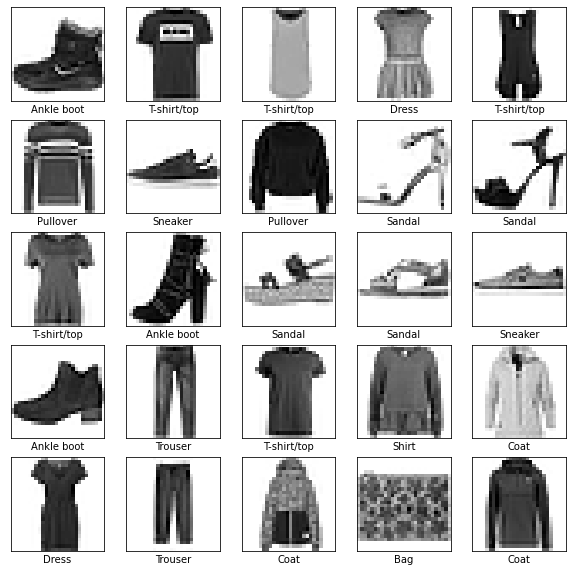

In [48]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

# 模型构建、训练、测试

In [49]:
# 模型构建
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [50]:
# 模型编译
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
# 模型训练
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 3.4588 - accuracy: 0.7021
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6300 - accuracy: 0.7742
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5699 - accuracy: 0.7966
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5449 - accuracy: 0.8098
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5272 - accuracy: 0.8206


In [52]:
# 模型测试
test_loss, test_acc = model.evaluate(x_test, y_test)

print(test_loss)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.5684 - accuracy: 0.8166
0.5683621168136597
0.8166000247001648


# 模型预测

In [53]:
predictions = model.predict(x_test[:1])
print(np.argmax(predictions))

9


In [32]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

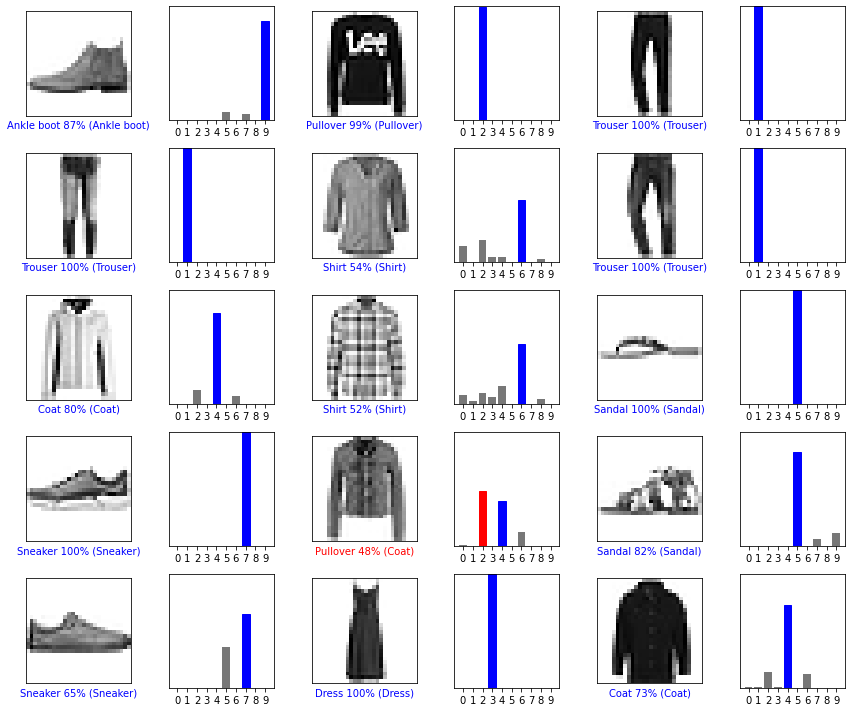

In [54]:
predictions = model.predict(x_test)
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

# 模型使用

(28, 28)


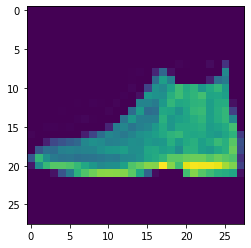

(1, 28, 28)


In [55]:
img = x_test[0]
print(img.shape)
plt.figure()
plt.imshow(img)
plt.show()

img = np.expand_dims(img, 0)
print(img.shape)

9


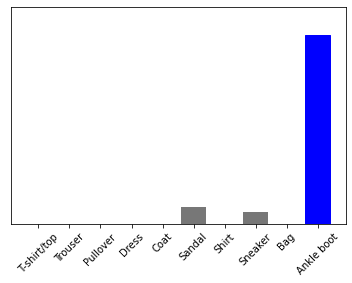

In [57]:
predict = model.predict(img)[0]
print(np.argmax(predict))
plot_value_array(0, predict, y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

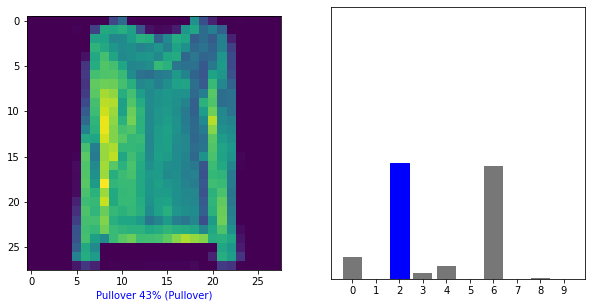

In [75]:
index = 103
p = model.predict(np.expand_dims(x_test[index],0))


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1 )
plt.imshow(x_test[index])
label = np.argmax(p[0])
if label == y_test[index]:
    color = 'blue'
else:
    color = 'red'

plt.xlabel("{} {:2.0f}% ({})".format(class_names[label],
                                100*np.max(p[0]),
                                class_names[y_test[index]]),
                                color=color)


plt.subplot(1, 2, 2)
plt.grid(False)
plt.xticks(range(10))
plt.yticks([])
barplot = plt.bar(range(10), p[0], color="#777777")
plt.ylim([0, 1])
barplot[np.argmax(p[0])].set_color('red')
barplot[y_test[index]].set_color('blue')
plt.show()